In [ ]:
import numpy as np

def logistic_regression(X, y, alpha):
    
    # random weights
    w = np.random.uniform(0, 1, size= X.shape[1]+1)

    # Support functions
    def linear_model(X, w):
        X_ext = np.hstack([X, np.ones((X.shape[0], 1))])
        return X_ext @ w

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def learning_step(X, y, w, alpha):
        m = X.shape[0]
        predictions = sigmoid(linear_model(X, w))
        errors = predictions - y
        X_ext = np.hstack([X, np.ones((m, 1))])
        gradient = (1/m) * (X_ext.T @ errors)
        w_new = w - alpha * gradient
        return w_new

    #learning loop
    for _ in range(len(X)):
        w = learning_step(X, y, w, alpha)

    #final weights
    return w


In [9]:
import matplotlib.pyplot as plt

def visualisation(points, target, w):
    
    #wyświetlanie próbek 
    plt.figure(figsize=(8,6))
    plt.scatter(points[target==0][:,0], points[target==0][:,1], color='red', label='Class 0')
    plt.scatter(points[target==1][:,0], points[target==1][:,1], color='blue', label='Class 1')

    #Granica decyzyjna
    x1_vals = np.linspace(points[:,0].min()-0.5, points[:,0].max()+0.5, 200)
    x2_vals = -(w[0]*x1_vals + w[2])/w[1]
    plt.plot(x1_vals, x2_vals, color='green', label='Decision boundary')

    #dostosowywanie wykresów
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()

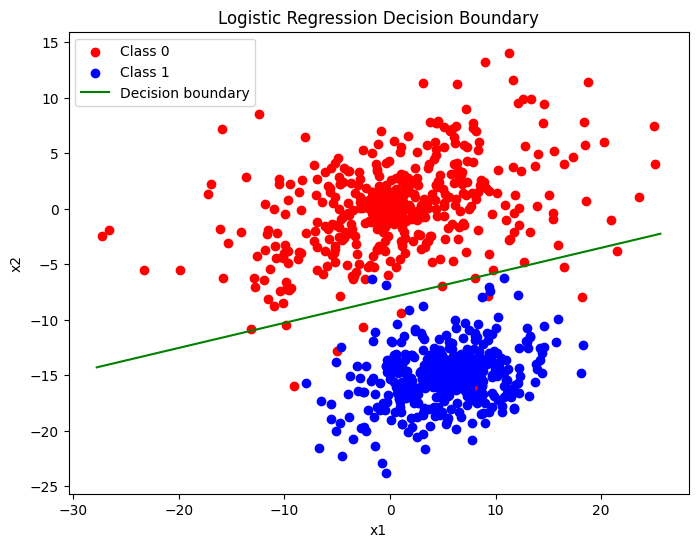

In [10]:
#latwe
points = np.load("data/attribute_easy.npy")
target = np.load("data/class_easy.npy")

w = logistic_regression(points, target, 0.1)
visualisation(points, target, w)

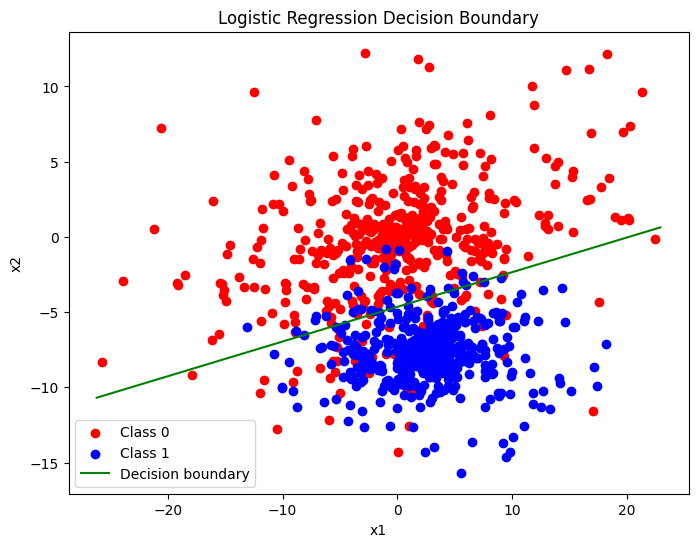

In [11]:
#trudne
points = np.load("data/attribute_hard.npy")
target = np.load("data/class_hard.npy")

w = logistic_regression(points, target, 0.1)
visualisation(points, target, w)